# Visualisation of GitHub Data


Connecting to the PostgreSQL database...Please wait...

Connection successful :) 


Connecting to the PostgreSQL database...Please wait...

Connection successful :) 


Connecting to the PostgreSQL database...Please wait...

Connection successful :) 


Connecting to the PostgreSQL database...Please wait...

Connection successful :) 


Connecting to the PostgreSQL database...Please wait...

Connection successful :) 



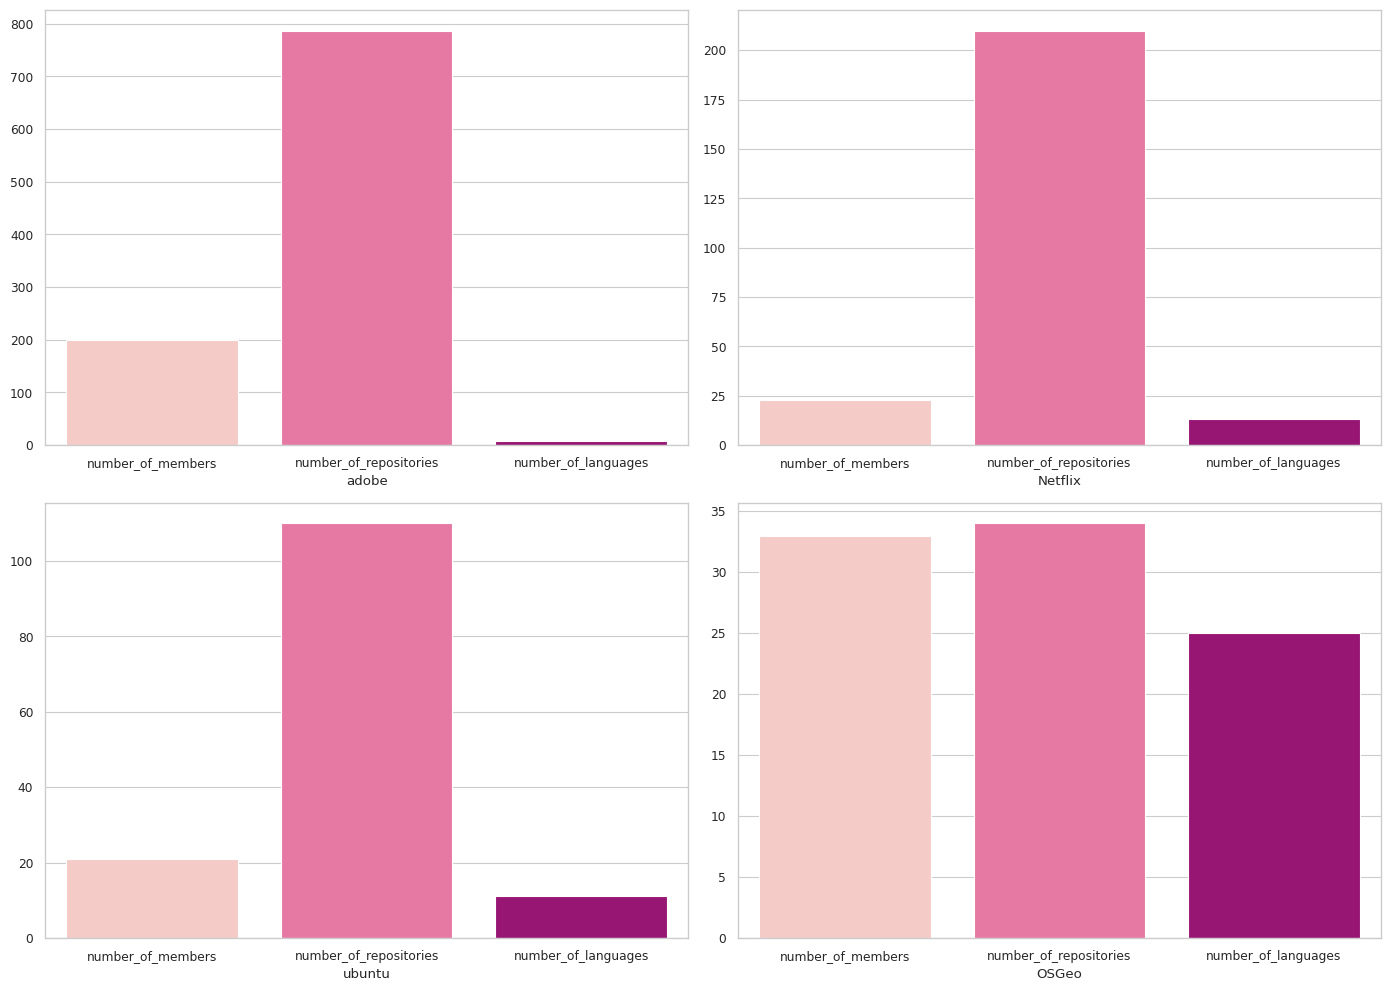

In [147]:

# Importing necessary libraries
from connect_to_db import ConnectToDatabase as cd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class QueryData:
    conn = cd._connecting_to_db()
    cur = conn.cursor()
    
    def _barchart_org_infos(self, org):
        """ Getting details for barchart creation """
        
        try:
            query_holder = 0
            col_names = 0
            self.cur.execute(f"SELECT organisation_name, number_of_members, number_of_repositories, number_of_languages FROM github.organisation WHERE organisation_name = '{org}';")
            query_holder = self.cur.fetchall()
            col_names = self.cur.description
            #self.cur.close()
            df = pd.DataFrame(query_holder, 
                              index= [org], 
                              columns= pd.Index([x[0] for x in col_names], name = org))
            conn = cd._connecting_to_db()
            return df
        
        except Exception as e:
            print(f"Bar chart for this org not available because: {str(e)}")
            exit(1)


if __name__ == "__main__":
    results_data1 = QueryData()._barchart_org_infos("adobe")
    results_data2 = QueryData()._barchart_org_infos("Netflix")
    results_data3 = QueryData()._barchart_org_infos("ubuntu")
    results_data4 = QueryData()._barchart_org_infos("OSGeo")
    f = plt.figure(figsize=(14, 10))
    sub_f = f.add_gridspec(2, 2)
    sns.set_context("paper")
    with sns.axes_style("whitegrid"):
        ax = f.add_subplot(sub_f[0, 0])
        sns.barplot(data= results_data1, palette= "RdPu")
    
    with sns.axes_style("whitegrid"):
        ax = f.add_subplot(sub_f[0, 1])
        sns.barplot(data= results_data2, palette= "RdPu")
    
    with sns.axes_style("whitegrid"):
        ax = f.add_subplot(sub_f[1, 0])
        sns.barplot(data= results_data3, palette= "RdPu")
    
    with sns.axes_style("whitegrid"):
        ax = f.add_subplot(sub_f[1, 1])
        sns.barplot(data= results_data4, palette= "RdPu")
    
    f.tight_layout()
    